In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

2023-08-23 10:09:27.026685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 10:09:27.056187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 10:09:27.057157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 10:09:28.012313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset= pd.read_csv('Datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

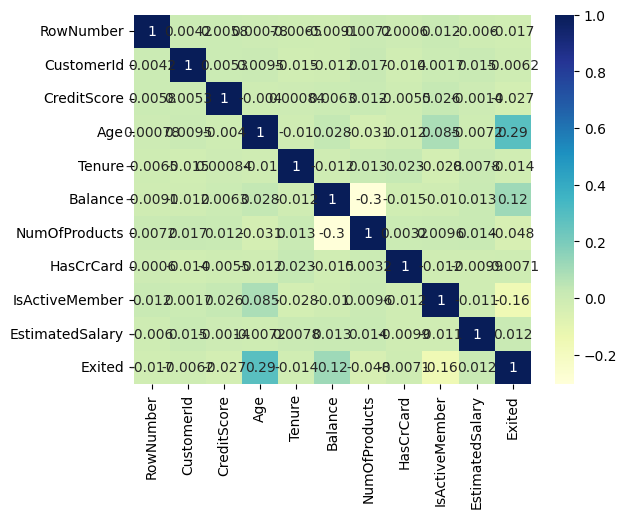

In [3]:
sns.heatmap(data=dataset.corr(), annot=True, cmap='YlGnBu')

In [4]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [9]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
classifier= Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [11]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 1s 1ms/step - loss: 0.5938 - accuracy: 0.7272 - val_loss: 0.4904 - val_accuracy: 0.8016
Epoch 2/50
536/536 [==============================] - 0s 819us/step - loss: 0.4659 - accuracy: 0.8067 - val_loss: 0.4582 - val_accuracy: 0.8099
Epoch 3/50
536/536 [==============================] - 0s 841us/step - loss: 0.4412 - accuracy: 0.8136 - val_loss: 0.4451 - val_accuracy: 0.8054
Epoch 4/50
536/536 [==============================] - 0s 821us/step - loss: 0.4289 - accuracy: 0.8184 - val_loss: 0.4363 - val_accuracy: 0.8084
Epoch 5/50
536/536 [==============================] - 0s 829us/step - loss: 0.4216 - accuracy: 0.8181 - val_loss: 0.4322 - val_accuracy: 0.8111
Epoch 6/50
536/536 [==============================] - 0s 813us/step - loss: 0.4166 - accuracy: 0.8237 - val_loss: 0.4282 - val_accuracy: 0.8122
Epoch 7/50
536/536 [==============================] - 0s 867us/step - loss: 0.4113 - accuracy: 0.8242 - val_loss: 0.4239 - val_accuracy: 0

In [13]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)

63/63 [==============================] - 0s 448us/step


In [14]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1528   67]
 [ 204  201]]


In [15]:
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)
print(model_history.history.keys())

The accuracy of the model is 0.8645
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


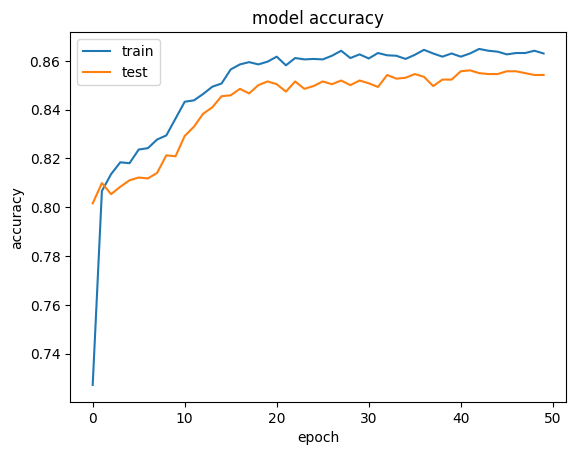

In [16]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()